In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [32]:
data = pd.read_csv('train.csv')

In [33]:
data.head(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [34]:
data.shape 

(42000, 785)

In [35]:
data.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
24629      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
24629       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
24629         0         0         0         0         0  

[1 rows x 785 columns]

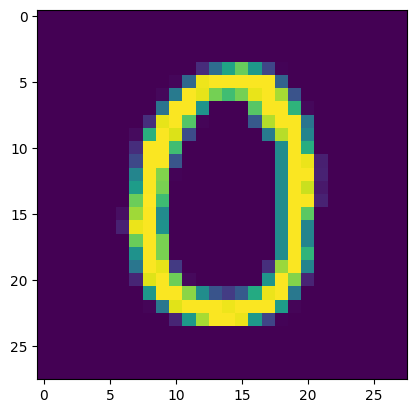

In [36]:
plt.imshow(data.iloc[783 , 1:].values.reshape(28 , 28))

In [61]:
X = data.drop(columns=['label'])
y = data['label']


In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.9648809523809524

#3 with different values of k neighbours

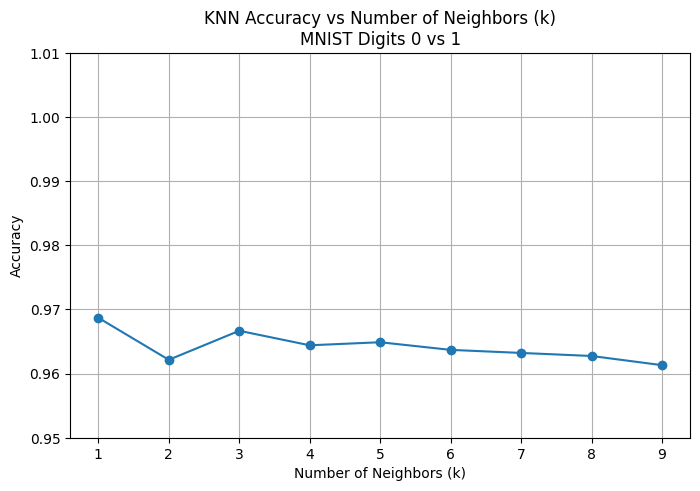

In [67]:
k_values = range(1, 10)  # Try k = 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 4. Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors (k)\nMNIST Digits 0 vs 1")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.ylim(0.95, 1.01)  # Since it's a simple binary task
plt.show()


## Standard Scaler and Principal Component Analysis

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
pca = PCA(n_components=100)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)



In [46]:
X_train.shape

(33600, 100)

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_pred = accuracy_score(y_test , y_pred)

In [48]:
y_pred

0.9648809523809524

## PCA for visualization

In [49]:
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(X_train)
x_test_trf = pca.transform(X_test)


In [50]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig  = px.scatter(x=x_train_trf[: , 0] , y=x_train_trf[: , 1], color=y_train_trf , color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [51]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(X_train)
x_test_trf = pca.transform(X_test)


In [52]:
y_train_trf = y_train.astype(str)
fig  = px.scatter_3d( data , x=x_train_trf[: , 0] , y=x_train_trf[: , 1], z=x_train_trf[: , 2] , color=y_train_trf)
fig.update_layout(margin=dict(l=20 , r=20  , t=20 , b=20))
fig.show()

In [60]:
pca.explained_variance_

array([1039101.59162875,  289058.0381413 ])

Decision Boundary with just two classes 0 and 1

In [53]:
X = data.drop(columns=['label'])
y = data['label']
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
pca1 = PCA(n_components=2)
X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

In [55]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

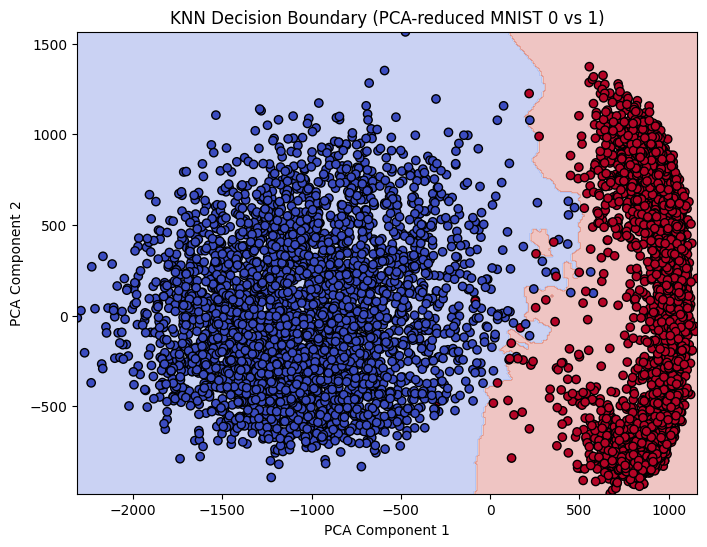

In [56]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict class for each point in mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (PCA-reduced MNIST 0 vs 1)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()